#1.**Project Objective**
Ans:- The Main Objective is to perform EDA on The Titanic dataset Using Pandas, Seaborn, and Matplotlib to identify survival patterns and understand the demographics of passengers.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/titanic.csv')   #Reading CSV Files
data.head(5)                                #Displaying Top 5 Rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
required_inputs = data[['PassengerId','Name','Sex','Age','Pclass','Survived']].copy()      #taking required inputs for EDA

In [ ]:
#Changing the Columns Name of Sex, PassengerID And Pclass

required_inputs.rename(columns={'PassengerId':'PassengerID','Sex':"Gender",'Pclass':"Class"},inplace=True)
required_inputs.head()

,PassengerID,Name,Gender,Age,Class,Survived
0,892,"Kelly, Mr. James",male,34.5,3,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,3,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,2,0
3,895,"Wirz, Mr. Albert",male,27.0,3,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3,1


In [ ]:
required_inputs.isnull().sum()      # Check for missing values

,0
PassengerID,0
Name,0
Gender,0
Age,86
Class,0
Survived,0


In [ ]:
# Filling missing age with median
required_inputs["Age"]=required_inputs["Age"].fillna(required_inputs["Age"].median())

# Convert 'Age' and 'int64' to category type
required_inputs["Age"] = required_inputs["Age"].astype('int64')

# Convert 'Gender' and 'Class' to category type

required_inputs["Gender"] = required_inputs["Gender"].astype('category')
required_inputs["Class"] = required_inputs["Class"].astype('category')


In [ ]:
required_inputs.info()   #cheking the datatypes of every columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerID  418 non-null    int64   
 1   Name         418 non-null    object  
 2   Gender       418 non-null    category
 3   Age          418 non-null    int64   
 4   Class        418 non-null    category
 5   Survived     418 non-null    int64   
dtypes: category(2), int64(3), object(1)
memory usage: 14.3+ KB


**VISUALIZATION**

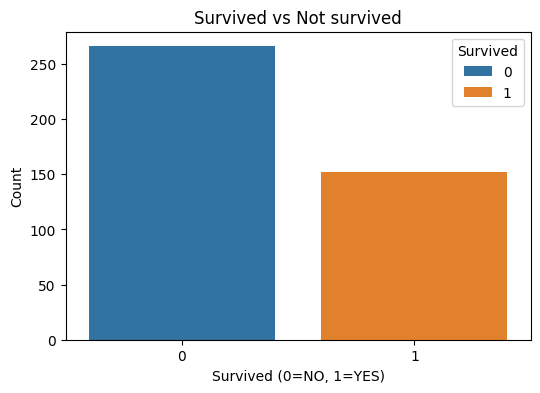

In [ ]:
#Countplot: Survived vs not survived

plt.figure(figsize=(6,4))
sns.countplot(x='Survived',data=required_inputs,hue="Survived")
plt.title('Survived vs Not survived')
plt.xlabel("Survived (0=NO, 1=YES)")
plt.ylabel("Count")
plt.show()

In [ ]:
print(required_inputs["Survived"].value_counts())      #using python

Survived
0    266
1    152
Name: count, dtype: int64


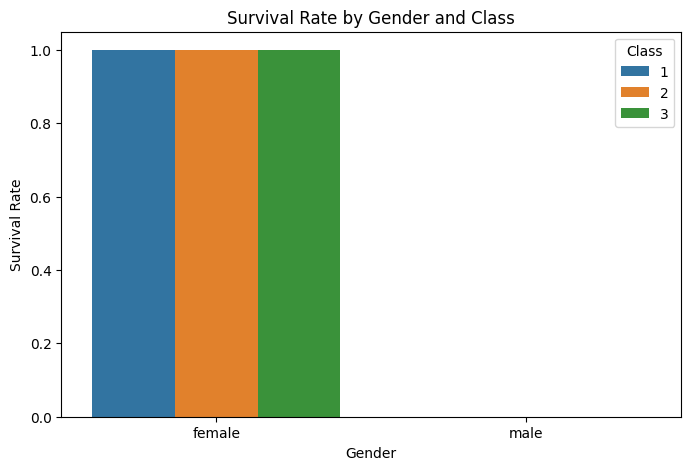

In [ ]:
# 2. Bar Plot: Survival by Gender and Class

plt.figure(figsize=(8,5))
sns.barplot(x='Gender', y='Survived', hue='Class', data=required_inputs, estimator='mean')

plt.title('Survival Rate by Gender and Class')
plt.ylabel('Survival Rate')
plt.show()

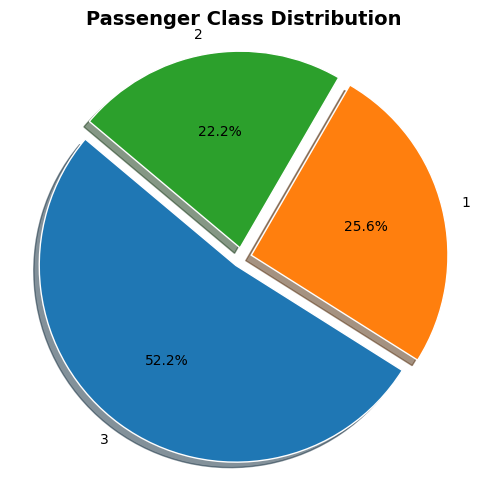

In [ ]:
# Pie: Class distribution

class_counts = required_inputs['Class'].value_counts()
explode = [0.05] * len(class_counts)


plt.figure(figsize=(5, 5))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    shadow=True,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title('Passenger Class Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


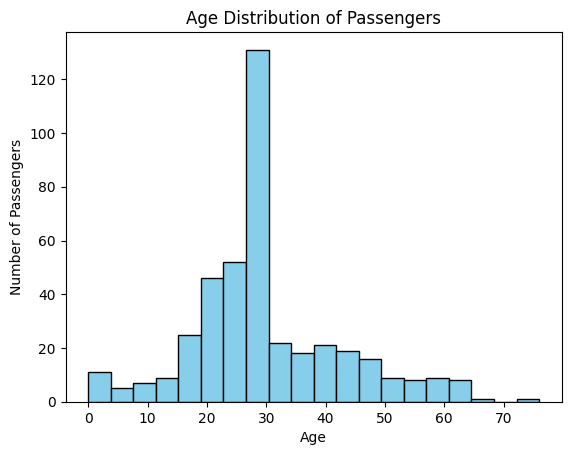

In [ ]:
# 4. Histogram - Age Distribution
plt.hist(required_inputs['Age'], bins=20, edgecolor='black', color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

In [ ]:
print(required_inputs['Gender'].unique())
print(required_inputs['Class'].unique())
print(required_inputs['Survived'].unique())

['male', 'female']
Categories (2, object): ['female', 'male']
[3, 2, 1]
Categories (3, int64): [1, 2, 3]
[0 1]


In [ ]:
required_inputs.isnull().sum()

,0
PassengerID,0
Name,0
Gender,0
Age,0
Class,0
Survived,0
